In [1]:
from scipy.io import wavfile
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [2]:

sample_rate, data = wavfile.read("S70_20200114_150211_982.wav")

print("Fréquence d’échantillonnage :", sample_rate)
print("Type des données :", data.dtype)
print("Forme des données :", data.shape)

Fréquence d’échantillonnage : 384000
Type des données : int16
Forme des données : (46080000, 5)


In [ ]:
n_samples, n_channels = data.shape

plt.figure(figsize=(12, 8))

for i in range(n_channels):
    plt.subplot(n_channels, 1, i + 1)
    # plt.plot(data[22000:395000, i])
    plt.plot(data[:, i])
    plt.title(f"Canal {i+1}")
    plt.ylabel("Amplitude")
    if i == n_channels - 1:
        plt.xlabel("Echantillons")

plt.tight_layout()
plt.show()

In [3]:
seg = data[352000:395000]

canal5 = seg[:, 4].astype(np.float32)

signal_abs = np.abs(canal5)

seuil = 0.5 * np.max(signal_abs)

ups = np.where(seg > seuil)[0]
downs = np.where(seg < -seuil)[0]

print(f"{len(ups)} impulsions up")
print(f"{len(downs)} impulsions down")

print(ups)
print(downs[0]-ups[0])

2 impulsions up
2 impulsions down
[4457 4458]
36963


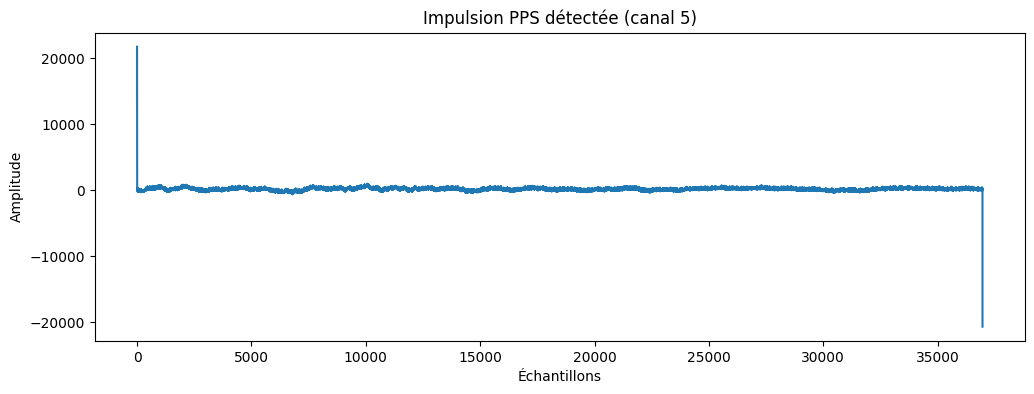

In [4]:
plt.figure(figsize=(12, 4))
pps = canal5[ups[0]:downs[0]+1]
plt.plot(pps)  # 2 secondes de signal
plt.title("Impulsion PPS détectée (canal 5)")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.show()

46080000


/mnt/c/Users/shawn/Desktop/M2/Baleines/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


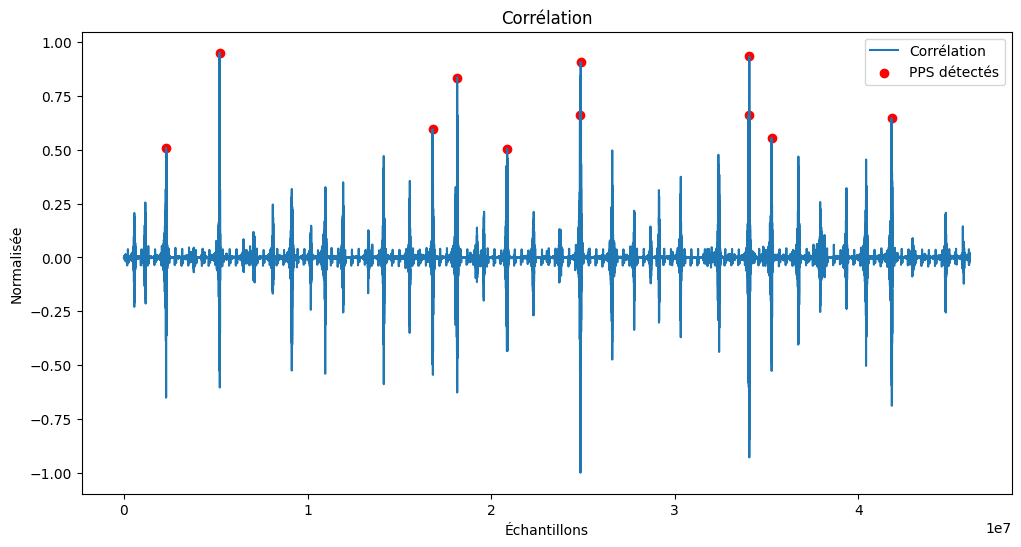

In [9]:
from scipy.signal import correlate

# atome = pps
atome = pps - np.mean(pps)
atome /= np.max(np.abs(atome))

# --- Canal cible ---
fs = 384000  # fréquence d'échantillonnage
canal = data[:,4].astype(float)  # 6ème canal si data[5]
canal -= np.mean(canal)
canal /= np.max(np.abs(canal))

print(len(canal))

# --- Corrélation ---
corr = correlate(atome, canal, mode='valid')
corr /= np.max(np.abs(corr))
seuil_corr = 0.5
indices_pps, _ = find_peaks(corr, height=seuil_corr, distance=len(atome))

# --- Affichage ---
plt.figure(figsize=(12,6))
plt.plot(corr, label="Corrélation")
plt.scatter(indices_pps, corr[indices_pps], color='red', label="PPS détectés")
plt.xlabel("Échantillons")
plt.ylabel("Normalisée")
plt.title("Corrélation")
plt.legend()
plt.show()

In [8]:
print(len(indices_pps))

76
